## AIS Validation

In [155]:
# from IPython.display import Image, HTML
import os
import numpy as np
import pandas as pd
import datetime
import warnings
from glob import glob

warnings.filterwarnings("ignore")           # Suppress Warning

In [156]:
WorkingFolder = "/Users/cv0361/Desktop/TechChallenge/Data/csv/AIS_Processed/"

In [157]:
OutputDir = WorkingFolder

### Combining Vessels Data

In [158]:
# Combining all Vessels Data
df_list = list()

for folder in glob(WorkingFolder + "*/"):
    
    #******** Temp hack
    folder = "/Users/cv0361/Desktop/TechChallenge/Data/csv/AIS_Processed/Zone03_2017_01/"
    #************
    
    print(folder)
    df = pd.read_csv(folder + "Vessel.csv", sep=",")
    
    print("Rows:", len(df))
    
    df_list.append(df)
    
    break
    
Vessel = pd.concat(df_list, ignore_index=True)
print("Total Rows:", Vessel.shape)

# Remove duplicate vessel records after combining all the zones/years
Vessel.drop_duplicates(inplace=True)

print("Non-Dup Total Rows:", Vessel.shape)
# Vessel.reset_index(inplace=True)

/Users/cv0361/Desktop/TechChallenge/Data/csv/AIS_Processed/Zone03_2017_01/
Rows: 823
Total Rows: (823, 7)
Non-Dup Total Rows: (823, 7)


In [159]:
Vessel.shape

(823, 7)

In [160]:
Vessel.head()

,mmsi_id,imo,call_sign,vessel_name,vessel_type,length,width
0,564294000,IMO9736963,9V2597,PEGASUS OCEAN,1004.0,174.53,NaN
1,367373760,IMO7915905,WDE5954,NORTH SEA,1001.0,37.32,9.56
2,367094420,IMO7926605,WDC8874,ARCTIC MARINER,1001.0,31.00,9.28
3,373073000,IMO9605097,3FGE2,PACIFIC CYPRESS,1004.0,179.98,29.80
4,367124050,IMO7609295,WDA6405,CASCADE MARINER,1001.0,25.06,7.32


In [161]:
Vessel.tail()

,mmsi_id,imo,call_sign,vessel_name,vessel_type,length,width
818,356839000,IMO9514389,3EVW8,MEDI OKINAWA,1004.0,189.98,32.25
819,371449000,IMO9416977,3FNL8,NYK RIGEL,1004.0,294.10,32.20
820,566662000,IMO9603439,9V9450,CAPE AZALEA,1004.0,300.00,50.00
821,311000317,IMO9700299,C6BO3,AFRICAN ROOK,1004.0,183.00,30.60
822,477464500,IMO9484352,VRKX9,COSCO JEDDAH,1004.0,261.10,32.25


### Validate MMSI Id

In [162]:
# Cast MMSI Id field to string
Vessel['TempId'] = Vessel['mmsi_id'].map(lambda x: str(x))
# Fetch the field lengh (number of digits)
Vessel['Id_len'] = Vessel['TempId'].map(lambda x: len(x))
# Fetch starting digit 
Vessel['StartDigit'] = Vessel['TempId'].map(lambda x: int(x[0]))

df.head()

,mmsi_id,imo,call_sign,vessel_name,vessel_type,length,width
0,564294000,IMO9736963,9V2597,PEGASUS OCEAN,1004.0,174.53,NaN
1,367373760,IMO7915905,WDE5954,NORTH SEA,1001.0,37.32,9.56
2,367094420,IMO7926605,WDC8874,ARCTIC MARINER,1001.0,31.00,9.28
3,373073000,IMO9605097,3FGE2,PACIFIC CYPRESS,1004.0,179.98,29.80
4,367124050,IMO7609295,WDA6405,CASCADE MARINER,1001.0,25.06,7.32


In [163]:
# MMSI Id NOT 9 digits
Vessel.loc[Vessel['Id_len'] != 9].head()

,mmsi_id,imo,call_sign,vessel_name,vessel_type,length,width,TempId,Id_len,StartDigit
266,43676060,IMO0964016,WCD8162,SILVER SPRAY,30.0,32.0,9.0,43676060,8,4


In [164]:
# Purge - MMSI Id NOT 9 digits
Vessel = Vessel.loc[Vessel['Id_len'] == 9]
print("Remaining Rows:", Vessel.shape)

Remaining Rows: (822, 10)


In [165]:
# MMSI Id starting digit NOT from 2 to 7
Vessel.loc[(Vessel['StartDigit'] < 2) | (Vessel['StartDigit'] > 7)].head()

,mmsi_id,imo,call_sign,vessel_name,vessel_type,length,width,TempId,Id_len,StartDigit
294,970112626,NaN,NaN,NaN,NaN,NaN,NaN,970112626,9,9
344,969929628,NaN,NaN,NaN,NaN,NaN,NaN,969929628,9,9
360,940138442,NaN,NaN,NaN,NaN,NaN,NaN,940138442,9,9


In [166]:
# Purge - MMSI Id starting digit NOT from 2 to 7
Vessel = Vessel.loc[(Vessel['StartDigit'] > 1) & (Vessel['StartDigit'] < 8)]
print("Remaining Rows:", Vessel.shape)

Remaining Rows: (819, 10)


In [167]:
# Duplicate MMSI Id
df = Vessel.groupby(['mmsi_id']).size().reset_index(name='counts')
df.sort_values(by=['counts'], ascending=False).head()

,mmsi_id,counts
0,205700000,1
550,372399000,1
540,372008000,1
541,372031000,1
542,372191000,1


In [168]:
Vessel.drop_duplicates("mmsi_id", inplace=True)
print("Remaining Rows:", df.shape)

Remaining Rows: (819, 2)


In [169]:
Vessel.head()

,mmsi_id,imo,call_sign,vessel_name,vessel_type,length,width,TempId,Id_len,StartDigit
0,564294000,IMO9736963,9V2597,PEGASUS OCEAN,1004.0,174.53,NaN,564294000,9,5
1,367373760,IMO7915905,WDE5954,NORTH SEA,1001.0,37.32,9.56,367373760,9,3
2,367094420,IMO7926605,WDC8874,ARCTIC MARINER,1001.0,31.00,9.28,367094420,9,3
3,373073000,IMO9605097,3FGE2,PACIFIC CYPRESS,1004.0,179.98,29.80,373073000,9,3
4,367124050,IMO7609295,WDA6405,CASCADE MARINER,1001.0,25.06,7.32,367124050,9,3


In [116]:
# Save to file
Vessel.to_csv(OutputDir + "All_Vessels.csv", index=False)

### Validate Broadcast Data
* pip install shapely
* pip install geopandas
* pip install descartes

In [183]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

/Users/cv0361/Desktop/TechChallenge/Data/csv/AIS_Processed/Zone02_2017_01/
Rows: 213760


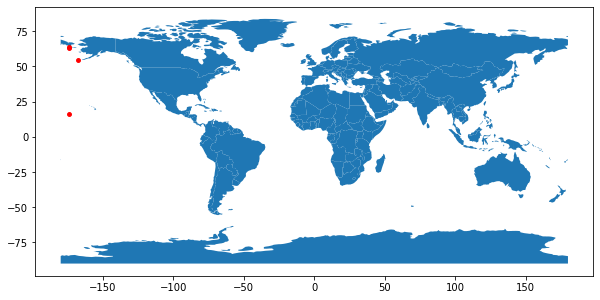

In [247]:
count = 0
for folder in glob(WorkingFolder + "*/"):
    data_array = list()
#     #******** Temp hack
#     folder = "/Users/cv0361/Desktop/TechChallenge/Data/csv/AIS_Processed/Zone02_2017_01/"
#     #************
    
    print(folder)
    Broadcast = pd.read_csv(folder + "Broadcast.csv", sep=",")
    
    print("Rows:", len(Broadcast))
    
    # Fetch Lat extreme values
    Broadcast = Broadcast.sort_values(by=['lat'], ascending=True)  # Sort by Lat
    temp = Broadcast.head(1)     # get lowest value
    data_array.append(temp[['lat', 'lon']].values[0])
    temp = Broadcast.tail(1)     # get highest value
    data_array.append(temp[['lat', 'lon']].values[0])
    
    # Fetch Lon extreme values
    Broadcast = Broadcast.sort_values(by=['lon'], ascending=True)  # Sort by Lon
    temp = Broadcast.head(1)     # get lowest value
    data_array.append(temp[['lat', 'lon']].values[0])
    temp = Broadcast.tail(1)     # get highest value
    data_array.append(temp[['lat', 'lon']].values[0])
    
    # df of lat/lon pairs
    df = pd.DataFrame(data_array, columns=['Latitude', 'Longitude'])
    
    # Plotting interested boundary coordinates
    geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
    gdf = GeoDataFrame(df, geometry=geometry)   

    #this is a simple map that goes with geopandas
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

    count += 1
    if count > 4: 
        break
    


In [248]:
Broadcast.head()

,mmsi_id,date_time,lat,lon,speed_over_ground,course_over_ground,voyage_id,heading,status
28644,273898000,2017-01-08T04:46:23,63.23322,-173.99992,4.0,-192.5,NaN,223.0,under way using engine
29033,273898000,2017-01-08T16:15:34,63.22008,-173.99827,4.1,52.5,NaN,63.0,under way using engine
213200,477982600,2017-01-31T19:10:13,52.72905,-173.99755,11.1,-150.6,NaN,261.0,under way using engine
179802,366940480,2017-01-27T11:55:57,52.46440,-173.99730,6.3,-136.5,NaN,277.0,undefined
28312,273898000,2017-01-08T04:44:33,63.23485,-173.99715,4.0,-192.4,NaN,223.0,under way using engine


In [249]:
sample = Broadcast[['lat', 'lon']].drop_duplicates()
sample.shape

(151958, 2)

In [250]:
sample['lat'] = sample['lat'].map(lambda x: round(x, 3))
sample['lon'] = sample['lon'].map(lambda x: round(x, 3))
sample.drop_duplicates(inplace=True)
sample.shape

(105923, 2)

In [251]:
sample.head()

,lat,lon
28644,63.233,-174.000
29033,63.220,-173.998
213200,52.729,-173.998
179802,52.464,-173.997
28312,63.235,-173.997


In [252]:
# Plotting interested boundary coordinates
geometry = [Point(xy) for xy in zip(sample['lon'], sample['lat'])]
gdf = GeoDataFrame(sample, geometry=geometry) 

In [253]:
sample.head()

,lat,lon,geometry
28644,63.233,-174.000,POINT (-174.00000 63.23300)
29033,63.220,-173.998,POINT (-173.99800 63.22000)
213200,52.729,-173.998,POINT (-173.99800 52.72900)
179802,52.464,-173.997,POINT (-173.99700 52.46400)
28312,63.235,-173.997,POINT (-173.99700 63.23500)


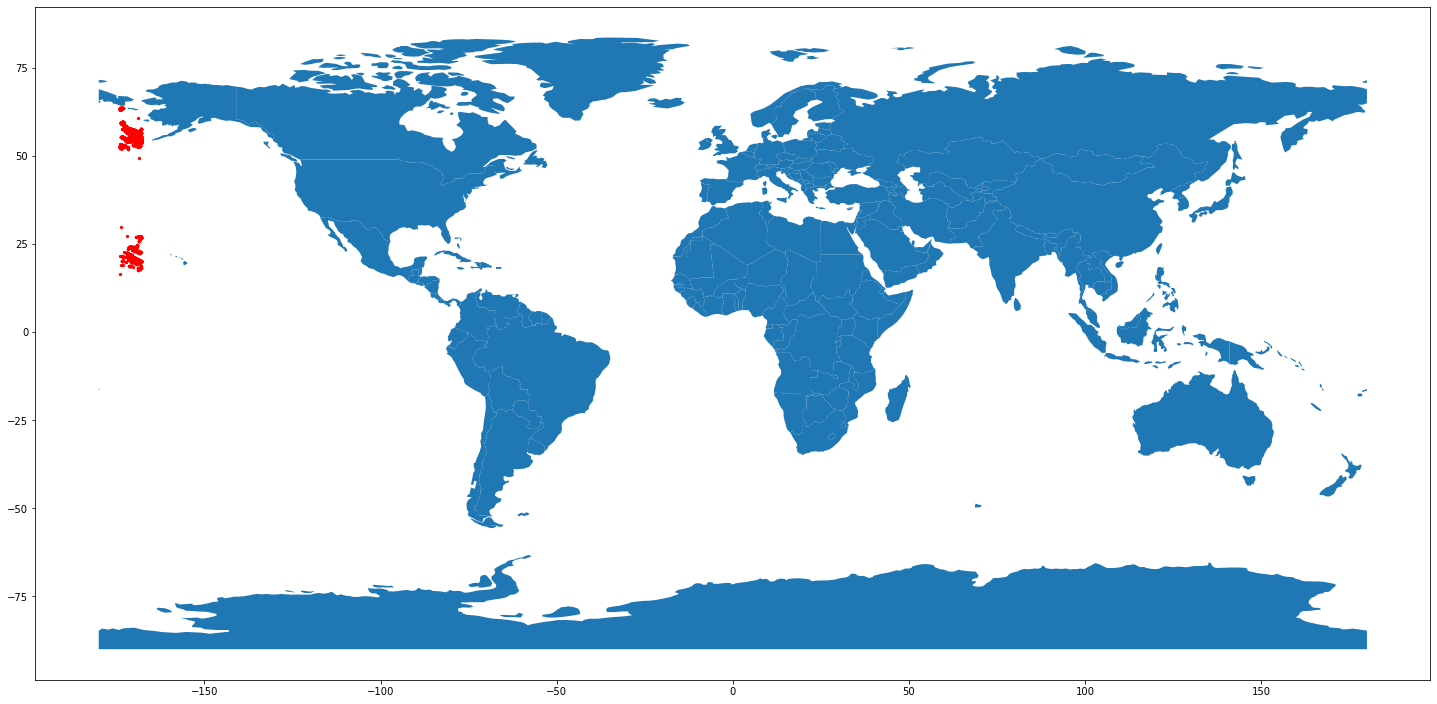

In [254]:
#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(25, 30)), marker='o', color='red', markersize=5);

### Validate Voyage Data?